## HW1: Train a perceptron model

In this homework, you will train a perceptron model with a simple dataset.

**Notes:** 
- When you submit your assignment, the output of every cell should be visible.
- You are not eligible to change any parts of the code except the predefined sections.
- You can add your implementation only in the predefined sections.



In [51]:
#@title Student Information
#@markdown Enter the following info and run the cell:
Name = "Tohid Abedini" #@param {type:"string"}
StudentNumber =  99722153 #@param {type:"integer"}

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Load Dataset

In [53]:
################################
## Change directory to the folder of the dataset
## For example, if the dataset is in NN/HW1 of your google drive, you should use this code in colab:
## cd drive/MyDrive/NN/HW1
################################

In [275]:
cd drive/MyDrive/NN

In [273]:
pwd

/e/uni/Master/3/NN/HW/HW01


In [56]:
## Load the dataset
dataset = pd.read_csv("dataset.csv")

In [57]:
## Dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      500 non-null    float64
 1   x2      500 non-null    float64
 2   y       500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [58]:
## See the five first rows of the dataset.
dataset.head()

,x1,x2,y
0,2.780914,3.649500,0
1,0.649471,4.428423,0
2,-3.393311,-1.439415,1
3,3.007704,2.896864,0
4,-3.745867,1.894699,1


Text(0.5, 1.0, 'Random Classification Data with 2 classes')

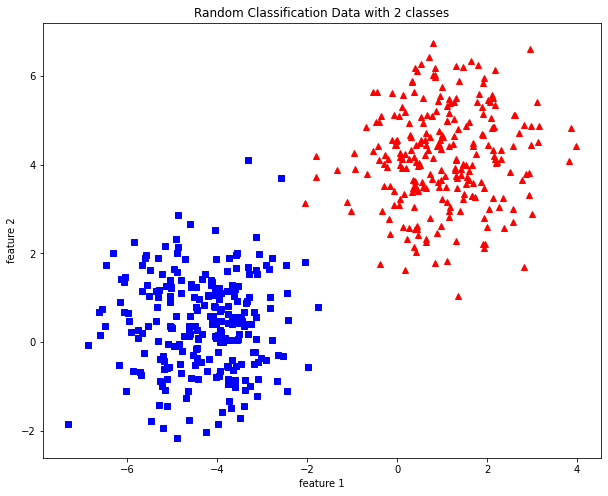

In [59]:
## Plot the dataset
X = dataset.drop(["y"], axis=1).values
y = dataset["y"].values

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

## Implement the algorithm

You have two weights and one bias. Let's call them w1 and w2 and b. Your have to code a simple gradient descent algorithm for updating these parameters. 

In [116]:
## Initialization of the parameters.
w1 = 0
w2 = 0
b = 0

In [117]:
def step_function(x):
    return np.where(x >= 0, 1, 0)
#     if x>=0:
#         return 1
#     else:
#         return 0

def calculate_output(X, w1, w2, b):
  ##############################################
    ## code here
    ## y_out is the output of your neuron.
    ## First, you should implement this formula: y_out = w1 * x1 + w2 * x2 + b
    ## please be careful to calculate this formula for all of the 500 data
    ## Second, you should implement a Unit Step function as an activation function for each element of the y_out
    ## the y_out should be an array with a length of 500.
  ##############################################
  y_out = step_function(w1 * X[:,0] + w2 * X[:,1] + b)
  return y_out

In [118]:
## implement the gradient descent algorithm
lr = 0.1
num_epochs = 20


for i in range(num_epochs):
  y_out = calculate_output(X, w1, w2, b)
  errors = 0
  for j in range(X.shape[0]):
    if y[j] != y_out[j] :
      errors += 1
    ######################################
    ## code here
    ## implement the code for updating each parameter
    ######################################
    b  = b  + lr * (y[j] - y_out[j])
    w1 = w1 + lr * (y[j] - y_out[j]) * X[:,0][j]
    w2 = w2 + lr * (y[j] - y_out[j]) * X[:,1][j]

  print("in epoch : ", i, " errors : ", errors)

print("w1 : ", w1, "w2 : ", w2, "b : ", b)

in epoch :  0  errors :  250
in epoch :  1  errors :  93
in epoch :  2  errors :  6
in epoch :  3  errors :  5
in epoch :  4  errors :  4
in epoch :  5  errors :  4
in epoch :  6  errors :  3
in epoch :  7  errors :  3
in epoch :  8  errors :  3
in epoch :  9  errors :  3
in epoch :  10  errors :  3
in epoch :  11  errors :  3
in epoch :  12  errors :  3
in epoch :  13  errors :  2
in epoch :  14  errors :  2
in epoch :  15  errors :  2
in epoch :  16  errors :  2
in epoch :  17  errors :  2
in epoch :  18  errors :  2
in epoch :  19  errors :  2
w1 :  -79.3918783365076 w2 :  -73.05256200885528 b :  -10.29999999999998


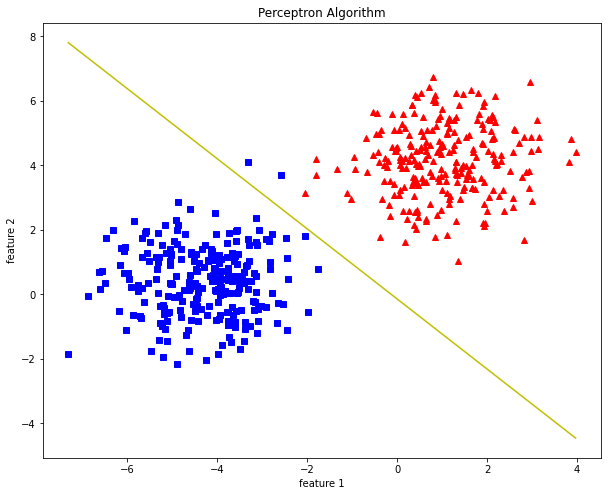

In [119]:
## Plot the result
x1 = [min(X[:,0]), max(X[:,0])]
m = -w1/w2
c = -b/w2
x2 = np.dot(m, x1) + c
    
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Perceptron Algorithm')
plt.plot(x1, x2, 'y-')

## Bonus Section
Explain learning rate decay and different methods for that.
Also, implement one of the methods of learning decay on the implemented code.

source:

https://medium.com/analytics-vidhya/learning-rate-decay-and-methods-in-deep-learning-2cee564f910b

It is good to have higher lr at the beginning and then decay it step by step to have lower lr in the next epochs.

Because we can make it to find better seperation line (answer) and move more accurately in the last steps insteas of rapid moves which are not effective in the improvement of the answer. It is known as lr decay.

### Different methods of decays are:

#### 1.Learning rate decay (common method):
α=(1/(1+decayRate×epochNumber))*α0 

1 epoch : 1 pass through data

α : learning rate (current iteration)

α0 : Initial learning rate

decayRate : hyper-parameter for the method
    
    
#### 2.Exponential Decay:
α = ( decayRate^(epochNumber) )*α0


#### 3.Discrete Staircase:

In this method learning rate is decreased in some discrete steps after every certain interval of time , for example you are reducing learning rate to its half after every 10 secs.

#### 4.Epoch Number Based:

α = ( k/ √epochNumber )* α0

In this method we take some constant ‘k’ and divide it with square root of epoch number.

#### 5.Mini-batch Number based:

α = ( k/ √t)* α0

In this method we take some constant ‘k’ and divide it with square root of Mini-Batch number. (This method is only used for Mini Batch Gradient Descent.)

#### 6.Manual Decay:
In this method practitioners manually examine the performance of algorithm and decrease the learning rate manually day by day or hour by hour etc.


In [124]:
# We use the first method here: Learning rate decay (common method)
# learning rate decay
def decay_lrate(initial_lrate, decay, iteration):
    return initial_lrate * (1.0 / (1.0 + decay * iteration))

#### Test the algortihm with the decaying lr

In [270]:
## Initialization of the parameters.
w1 = 0
w2 = 0
b = 0

## implement the gradient descent algorithm with lr decay
lr = 0.5
num_epochs = 20

lr_list = [lr]

for i in range(num_epochs):
  y_out = calculate_output(X, w1, w2, b)
  errors = 0
  for j in range(X.shape[0]):
    if y[j] != y_out[j] :
      errors += 1
    ######################################
    ## code here
    ## implement the code for updating each parameter
    ######################################
    b  = b  + lr * (y[j] - y_out[j])
    w1 = w1 + lr * (y[j] - y_out[j]) * X[:,0][j]
    w2 = w2 + lr * (y[j] - y_out[j]) * X[:,1][j]
    
  lr = decay_lrate(initial_lrate=lr, decay=0.001, iteration=i)
  lr_list.append(lr)

  print("in epoch : ", i, " errors : ", errors)

print("w1 : ", w1, "w2 : ", w2, "b : ", b)

in epoch :  0  errors :  250
in epoch :  1  errors :  93
in epoch :  2  errors :  6
in epoch :  3  errors :  5
in epoch :  4  errors :  4
in epoch :  5  errors :  4
in epoch :  6  errors :  3
in epoch :  7  errors :  3
in epoch :  8  errors :  3
in epoch :  9  errors :  3
in epoch :  10  errors :  3
in epoch :  11  errors :  3
in epoch :  12  errors :  3
in epoch :  13  errors :  3
in epoch :  14  errors :  2
in epoch :  15  errors :  2
in epoch :  16  errors :  2
in epoch :  17  errors :  2
in epoch :  18  errors :  2
in epoch :  19  errors :  2
w1 :  -394.406673737436 w2 :  -368.90581270668747 b :  -52.26554544410349


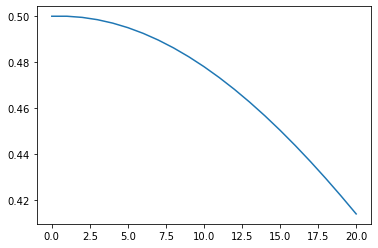

In [271]:
plt.plot(lr_list);

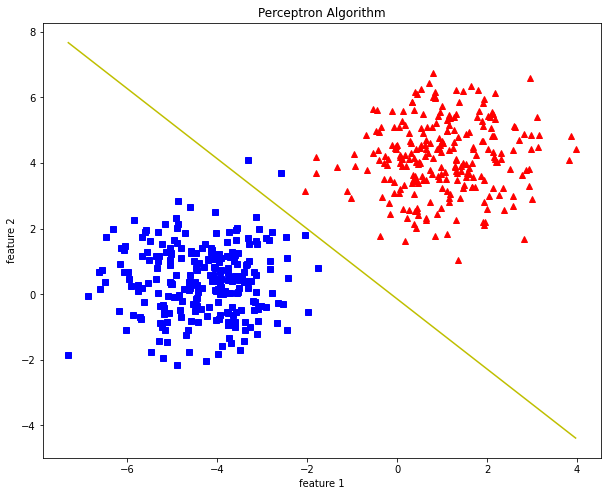

In [272]:
## Plot the result
x1 = [min(X[:,0]), max(X[:,0])]
m = -w1/w2
c = -b/w2
x2 = np.dot(m, x1) + c
    
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Perceptron Algorithm')
plt.plot(x1, x2, 'y-')